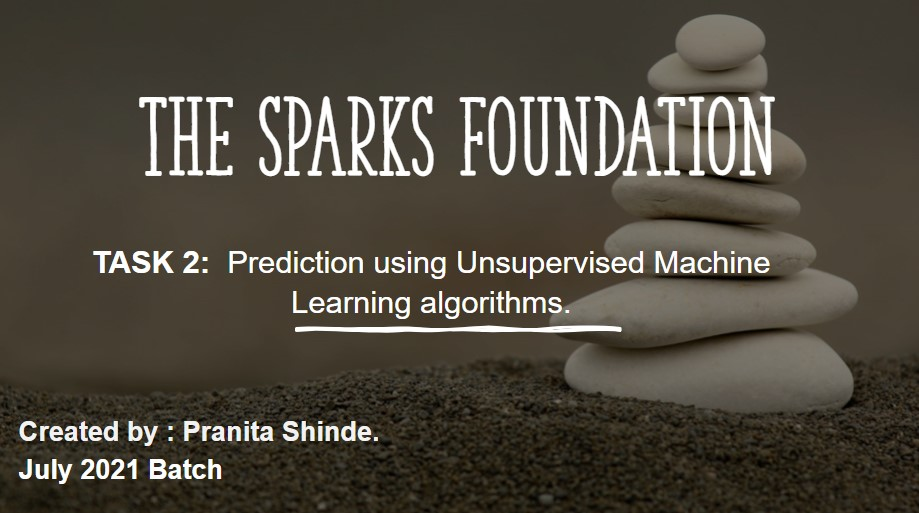

## Task is to predict the optimum number of clusters and represent it visually.


#### Import all the required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import datasets

#### Load the dataset


In [3]:
Data = datasets.load_iris()
Data_frame = pd.DataFrame(Data.data, columns = Data.feature_names)

#### illustration about type of dataset

**1.** Shape of dataset

In [4]:
print("Data set has following dimensions:",Data_frame.shape)

Data set has following dimensions: (150, 4)


**2.** First few entries in the dataset

In [5]:
Data_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**3.** Information about the columns data type

In [6]:
print(Data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


#### **4.** Identication of null values

In [8]:
print(Data_frame.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [9]:
print(Data_frame['sepal length (cm)'].isnull().value_counts())

False    150
Name: sepal length (cm), dtype: int64


In [10]:
print(Data_frame['sepal width (cm)'].isnull().value_counts())

False    150
Name: sepal width (cm), dtype: int64


In [11]:
print(Data_frame['petal length (cm)'].isnull().value_counts())

False    150
Name: petal length (cm), dtype: int64


In [12]:
print(Data_frame['petal width (cm)'].isnull().value_counts())

False    150
Name: petal width (cm), dtype: int64


### Selecting number of clusters by Elbow method  

#### Elbow method will help to identify the number of clusters which can accurately partition the data in purest form of clusters.

**Here, what I have done is computed the value at which there is no further decrease in distance between the centroid and points in that cluster.**

In [13]:
from sklearn.cluster import KMeans
n=15
X= Data_frame
#Note here distance stands for the minimum distane between point and all centeroids
distance = []
for i in range(1,n):
    kmeans_model = KMeans(n_clusters=i,  random_state=333) # Mention the Number of clusters
    kmeans_result = kmeans_model.fit(X) #Model building
    distance.append(kmeans_model.inertia_)
print(distance)

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.44618205128204, 39.066035353535376, 34.35601673815632, 30.137843073593086, 28.396503303713846, 26.689825064433947, 24.37412832781255, 22.778910198289857, 21.251004052964575, 20.133221377306917]


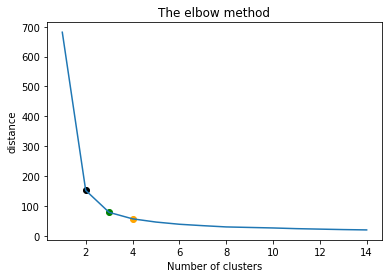

In [14]:
plt.plot(range(1, n), distance)
plt.scatter(2,distance[1],c='black')
plt.scatter(3,distance[2],c='green')
plt.scatter(4,distance[3],c='orange')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('distance') # Within cluster sum of squares
plt.show()

The slope between black dot and green dot is more steeper then between green and yellow dot. Less steeper the slope less is the distance euclidean distance betwwen the centroid and the point in the cluster. It is best to choose green dot as the best number of clusters.
Hence, The number of clusters is **3**.

In [15]:
# Applying kmeans to the dataset / Creating the kmeans classifier
Model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 333)
Model_Result = Model.fit_predict(X)

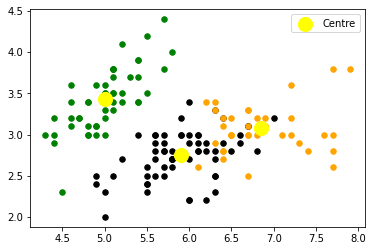

In [16]:
# Visualising the clusters - On the first two columns
X = Data_frame.iloc[:,[0,1,2,3]].values
plt.scatter(X[Model_Result == 0, 0], X[Model_Result == 0, 1], 
            s = 30, c = 'black')
plt.scatter(X[Model_Result == 1, 0], X[Model_Result == 1, 1], 
            s = 30, c = 'green')
plt.scatter(X[Model_Result == 2, 0], X[Model_Result == 2, 1],
            s = 30, c = 'orange')

# Plotting the centroids of the clusters
plt.scatter(Model.cluster_centers_[:, 0], Model.cluster_centers_[:,1], 
            s = 200, c = 'yellow', label = 'Centre')

plt.legend()